# VegaLite.jl examples

In [1]:
using Revise

In [2]:
using VegaLite, VegaDatasets, URIParser

## Maps (Geographic Displays)

#### Choropleth of unemployment rate per county

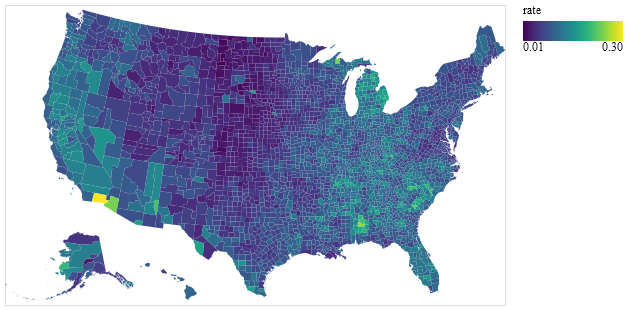

In [9]:
data = dataset("us-10m").path
data2 = dataset("unemployment.tsv").path

@vlplot(
    :geoshape,
    width=500, height=300,
    data={
        url=data,
        format={
            typ=:topojson,
            feature=:counties
        }
    },
    transform=[{
        lookup=:id,
        from={
            data=data2,
            key=:id,
            fields=["rate"]
        }
    }],
    projection={
        typ=:albersUsa
    },
    color="rate:q"
)

#### One dot per zipcode in the U.S 

In [ ]:
dataset("zipcodes").path |> vl"""
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.1.json",
  "width": 500,
  "height": 300,
  "transform": [{"calculate": "substring(datum.zip_code, 0, 1)", "as": "digit"}],
  "projection": {
    "type": "albersUsa"
  },
  "mark": "circle",
  "encoding": {
    "longitude": {
      "field": "longitude",
      "type": "quantitative"
    },
    "latitude": {
      "field": "latitude",
      "type": "quantitative"
    },
    "size": {"value": 1},
    "color": {"field": "digit", "type": "nominal"}
  }
}
""";

In [ ]:
dataset("zipcodes").path |>
@vlplot(
    :circle,
    width=500, height=300,
    transform=[{calculate="substring(datum.zip_code, 0, 1)", as=:digit}],
    projection={typ=:albersUsa},
    longitude="longitude:q",
    latitude="latitude:q",
    size={value=1},
    color="digit:n"
);

#### One dot per airport in the US overlayed on geoshape

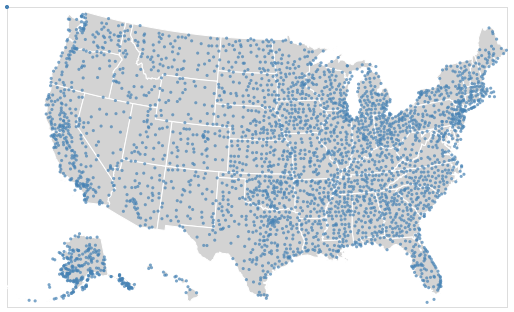

In [17]:
data = dataset("us-10m").path
data2 = dataset("airports")

@vlplot(width=500, height=300) +
@vlplot(
    mark={
        :geoshape,
        fill=:lightgray,
        stroke=:white
    },
    data={
        url=data,
        format={typ=:topojson, feature=:states}
    },
    projection={typ=:albersUsa},
) +
@vlplot(
    :circle,
    data=data2,
    projection={typ=:albersUsa},
    longitude="longitude:q",
    latitude="latitude:q",
    size={value=10},
    color={value=:steelblue}
)

#### Rules (line segments) connecting SEA to every airport reachable via direct flight

TODO

#### Three choropleths representing disjoint data from the same table

TODO

#### U.S. state capitals overlayed on a map of the U.S

```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.1.json",
  "width": 800,
  "height": 500,
  "projection": {
    "type": "albersUsa"
  },
  "layer": [
    {
      "data": {
        "url": "data/us-10m.json",
        "format": {
          "type": "topojson",
          "feature": "states"
        }
      },
      "mark": {
        "type": "geoshape",
        "fill": "lightgray",
        "stroke": "white"
      }
    },
    {
      "data": {
        "url": "data/us-state-capitals.json"
      },
      "encoding": {
        "longitude": {
          "field": "lon",
          "type": "quantitative"
        },
        "latitude": {
          "field": "lat",
          "type": "quantitative"
        }
      },
      "layer": [{
        "mark": {
          "type": "circle",
          "color": "orange"
        }
      }, {
        "mark": {
          "type": "text",
          "dy": -6
        },
        "encoding": {
          "text": {"field": "city", "type": "nominal"}
        }
      }]
    }
  ]
}
```

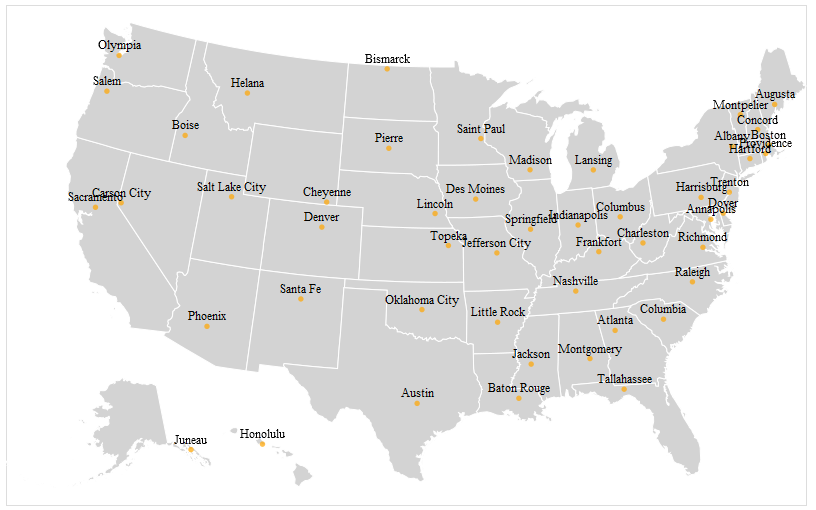

In [7]:
us10m = dataset("us-10m").path
usstatecapitals = dataset("us-state-capitals").path

p = @vlplot(width=800, height=500, projection={typ=:albersUsa}) +
@vlplot(
    data={
        url=us10m,
        format={
            typ=:topojson,
            feature=:states
        }
    },
    mark={
        :geoshape,
        fill=:lightgray,
        stroke=:white
    }
) +
(
    @vlplot(
        data={url=usstatecapitals},
        enc={
            longitude="lon:q",
            latitude="lat:q"
        }
    ) +
    @vlplot(mark={:circle, color=:orange}) +
    @vlplot(mark={:text, dy=-6}, text="city:n")
)

#### Line drawn between airports in the U.S. simulating a flight itinerary

TODO

#### Income in the U.S. by state, faceted over income brackets

In [11]:
p = dataset("income").path |> @vlplot(
    width=500,
    height=300,
    transform=[{
        lookup=:id,
        from={
            data={
                url=dataset("us-10m").path,
                format={
                    typ=:topojson,
                    feature=:states
                }
            },
            key=:id
        },
        as=:geo
    }],
    projection={typ=:albersUsa},
    mark=:geoshape,
    shape="geo:geojson",
    color="pct:q",
    row="group:n"
)

ERROR TypeError: Cannot read property 'geometry' of null
    at Object.FeatureCollection (C:\Users\david\.julia\v0.6\VegaLite\deps\node_modules\vega\build\vega.js:20182:48)
    at geoStream (C:\Users\david\.julia\v0.6\VegaLite\deps\node_modules\vega\build\vega.js:20234:34)
    at fit (C:\Users\david\.julia\v0.6\VegaLite\deps\node_modules\vega\build\vega.js:22205:3)
    at fitExtent (C:\Users\david\.julia\v0.6\VegaLite\deps\node_modules\vega\build\vega.js:22212:10)
    at fitSize (C:\Users\david\.julia\v0.6\VegaLite\deps\node_modules\vega\build\vega.js:22223:10)
    at Function.albersUsa.fitSize (C:\Users\david\.julia\v0.6\VegaLite\deps\node_modules\vega\build\vega.js:22650:12)
    at fit$1 (C:\Users\david\.julia\v0.6\VegaLite\deps\node_modules\vega\build\vega.js:23328:21)
    at Projection.prototype$69.transform (C:\Users\david\.julia\v0.6\VegaLite\deps\node_modules\vega\build\vega.js:23320:14)
    at Projection.prototype$7.evaluate (C:\Users\david\.julia\v0.6\VegaLite\deps\node_module

ERROR TypeError: Cannot read property 'geometry' of null
    at Object.FeatureCollection (C:\Users\david\.julia\v0.6\VegaLite\deps\node_modules\vega\build\vega.js:20182:48)
    at geoStream (C:\Users\david\.julia\v0.6\VegaLite\deps\node_modules\vega\build\vega.js:20234:34)
    at fit (C:\Users\david\.julia\v0.6\VegaLite\deps\node_modules\vega\build\vega.js:22205:3)
    at fitExtent (C:\Users\david\.julia\v0.6\VegaLite\deps\node_modules\vega\build\vega.js:22212:10)
    at fitSize (C:\Users\david\.julia\v0.6\VegaLite\deps\node_modules\vega\build\vega.js:22223:10)
    at Function.albersUsa.fitSize (C:\Users\david\.julia\v0.6\VegaLite\deps\node_modules\vega\build\vega.js:22650:12)
    at fit$1 (C:\Users\david\.julia\v0.6\VegaLite\deps\node_modules\vega\build\vega.js:23328:21)
    at Projection.prototype$69.transform (C:\Users\david\.julia\v0.6\VegaLite\deps\node_modules\vega\build\vega.js:23320:14)
    at Projection.prototype$7.evaluate (C:\Users\david\.julia\v0.6\VegaLite\deps\node_module

In [12]:
JSON.print(p.params,2)

{
  "height": 300,
  "encoding": {
    "shape": {
      "field": "geo",
      "type": "geojson"
    },
    "color": {
      "field": "pct",
      "type": "quantitative"
    },
    "row": {
      "field": "group",
      "type": "nominal"
    }
  },
  "data": {
    "url": "file://C:/Users/david/.julia/v0.6/VegaDatasets/data/data/income.json"
  },
  "width": 500,
  "mark": "geoshape",
  "transform": [
    {
      "as": "geo",
      "from": {
        "key": "id",
        "data": {
          "format": {
            "typ": "topojson",
            "feature": "states"
          },
          "url": "file://C:/Users/david/.julia/v0.6/VegaDatasets/data/data/us-10m.json"
        }
      },
      "lookup": "id"
    }
  ],
  "projection": {
    "type": "albersUsa"
  }
}


#### London Tube Lines

TODO